## Linear Regression Metrics

In [1]:
import pandas as pd
url = 'housing.csv'
# 13 features and 1 target
names_reg = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT',
            'MEDV']
df_reg = pd.read_csv(url, delim_whitespace=True, names=names_reg)
array_reg = df_reg.values
x_reg = array_reg[:,0:13]
y_reg = array_reg[:,13]
df_reg

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273.0   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       17.8  392.83   4.03  34.7  
3       18.7  394.63   2.94  33.4  
4       18.7  396.90   5.33  36.2  
..       ...     ...    ...   ...  
501     21.0  391.99   9.67  22.4  
502     21.0  396.90   9.08  20.6  
503     21.0  396.90   5.64  23.9  
504     21.0  393.45   6.48  22.0  
505     21.0  396.90   7.88  11.9  

[506 rows x 14 columns]

## Mean Absolute Error

In [3]:
from sklearn.model_selection import train_test_split # division by percentage
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

test_size = 0.33
seed = 1

x_train, x_test, y_train, y_test = train_test_split(x_reg, y_reg, test_size = test_size, random_state = seed)
model = LinearRegression()
model.fit(x_train, y_train)
predicted = model.predict(x_test)
MAE = mean_absolute_error(y_test, predicted)
print(MAE)

3.417472278801661


## Mean Squared Error

In [5]:
from sklearn.model_selection import train_test_split # division by percentage
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

test_size = 0.33
seed = 7

x_train, x_test, y_train, y_test = train_test_split(x_reg, y_reg, test_size = test_size, random_state = seed)
model = LinearRegression()
model.fit(x_train, y_train)
predicted = model.predict(x_test)
MSE = mean_squared_error(y_test, predicted)
print(MSE)

25.32230742358626


## R Squared

In [7]:
from sklearn.model_selection import train_test_split # division by percentage
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

test_size = 0.33
seed = 7

x_train, x_test, y_train, y_test = train_test_split(x_reg, y_reg, test_size = test_size, random_state = seed)
model = LinearRegression()
model.fit(x_train, y_train)
predicted = model.predict(x_test)
R2 = r2_score(y_test, predicted)
print(R2*100)

66.63089606572564


# Feature Extraction

In [8]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

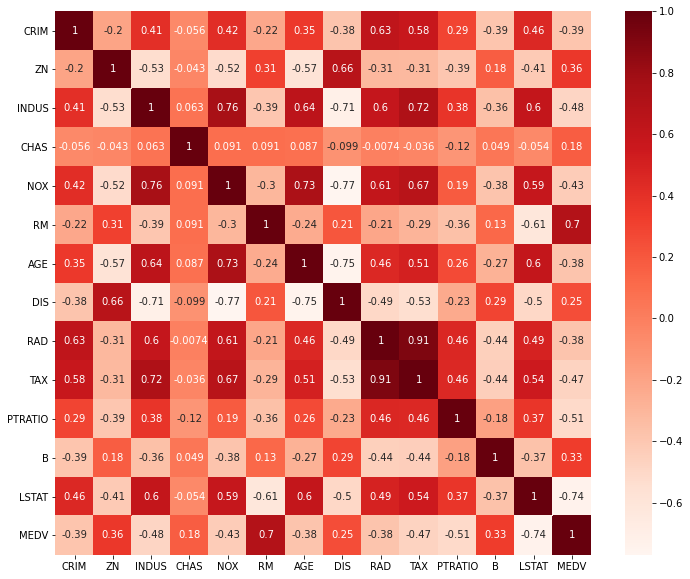

In [9]:
plt.figure(figsize=(12,10))
cor = df_reg.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [10]:
cor_target = abs(cor['MEDV'])
# get strongly correlated to target features 
relevant_features = cor_target[cor_target > 0.70]
relevant_features

LSTAT    0.737663
MEDV     1.000000
Name: MEDV, dtype: float64

In [11]:
corr_matrix = df_reg.corr().abs()
# k = 1 to skip diagonal, k = 0 to add it
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper # upper diagonal

<ipython-input-11-1c81da23eb67>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM      NaN  0.200469  0.406583  0.055892  0.420972  0.219247  0.352734   
ZN        NaN       NaN  0.533828  0.042697  0.516604  0.311991  0.569537   
INDUS     NaN       NaN       NaN  0.062938  0.763651  0.391676  0.644779   
CHAS      NaN       NaN       NaN       NaN  0.091203  0.091251  0.086518   
NOX       NaN       NaN       NaN       NaN       NaN  0.302188  0.731470   
RM        NaN       NaN       NaN       NaN       NaN       NaN  0.240265   
AGE       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
DIS       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
RAD       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
TAX       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
PTRATIO   NaN       NaN       NaN       NaN       NaN       NaN       NaN   
B         NaN       NaN       NaN       NaN       NaN       NaN       NaN   
LSTAT     NaN       NaN       NaN       NaN       NaN       NaN       NaN   
MEDV      NaN       NaN       NaN       NaN       NaN       NaN       NaN   

              DIS       RAD       TAX   PTRATIO         B     LSTAT      MEDV  
CRIM     0.379670  0.625505  0.582764  0.289946  0.385064  0.455621  0.388305  
ZN       0.664408  0.311948  0.314563  0.391679  0.175520  0.412995  0.360445  
INDUS    0.708027  0.595129  0.720760  0.383248  0.356977  0.603800  0.483725  
CHAS     0.099176  0.007368  0.035587  0.121515  0.048788  0.053929  0.175260  
NOX      0.769230  0.611441  0.668023  0.188933  0.380051  0.590879  0.427321  
RM       0.205246  0.209847  0.292048  0.355501  0.128069  0.613808  0.695360  
AGE      0.747881  0.456022  0.506456  0.261515  0.273534  0.602339  0.376955  
DIS           NaN  0.494588  0.534432  0.232471  0.291512  0.496996  0.249929  
RAD           NaN       NaN  0.910228  0.464741  0.444413  0.488676  0.381626  
TAX           NaN       NaN       NaN  0.460853  0.441808  0.543993  0.468536  
PTRATIO       NaN       NaN       NaN       NaN  0.177383  0.374044  0.507787  
B             NaN       NaN       NaN       NaN       NaN  0.366087  0.333461  
LSTAT         NaN       NaN       NaN       NaN       NaN       NaN  0.737663  
MEDV          NaN       NaN       NaN       NaN       NaN       NaN       NaN

In [15]:
threshold = 0.70
to_drop = [(column, upper[column][upper[column] > threshold].index) for column in upper.columns if any(upper[column] > threshold)]
#to_drop = [column for column in upper.columns if any(upper[column] > 0.75)]
to_drop

[('NOX', Index(['INDUS'], dtype='object')),
 ('AGE', Index(['NOX'], dtype='object')),
 ('DIS', Index(['INDUS', 'NOX', 'AGE'], dtype='object')),
 ('TAX', Index(['INDUS', 'RAD'], dtype='object')),
 ('MEDV', Index(['LSTAT'], dtype='object'))]